Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: colorspace

Loading required package: khroma

Loading required package: ggplot2

Loading required package: ggpattern

Loading required package: reshape2

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyv

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

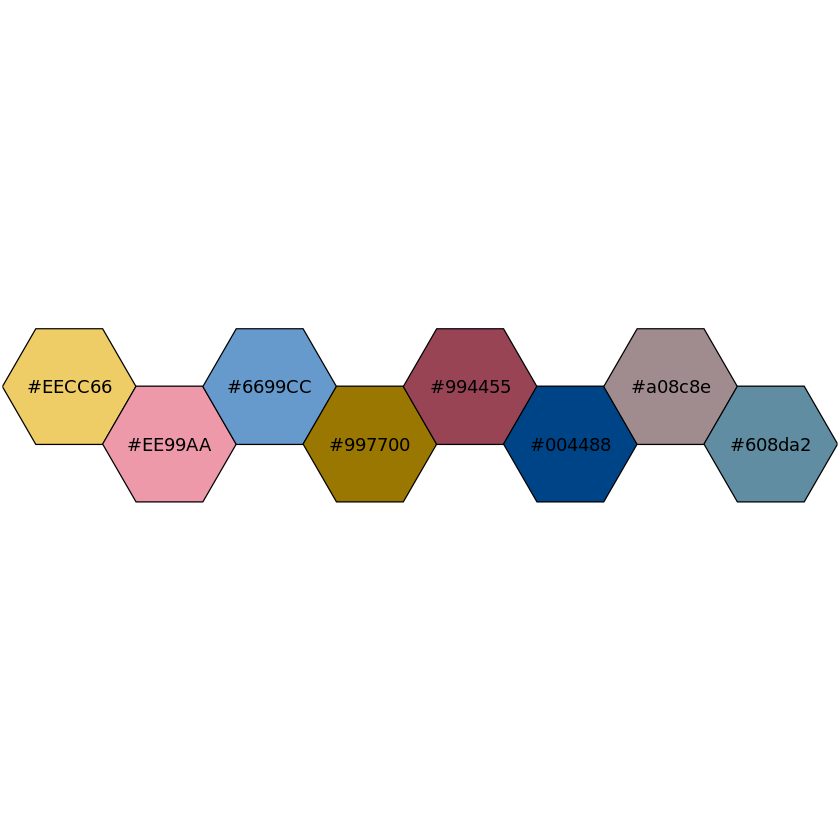

In [1]:
f_func <- "../functions.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_func, '--to=script', '--stdout'), stdout = TRUE)))
f_path <- "../dirs.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_path, '--to=script', '--stdout'), stdout = TRUE)))
f_cols <- "../cols.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_cols, '--to=script', '--stdout'), stdout = TRUE)))

In [2]:
lst_perc_root <- readRDS(paste0(INT_ReSeq, "lst_perc_root.Rdata"))
lst_perc_Asp <- readRDS(paste0(INT_ReSeq, "lst_perc_Asp.Rdata"))
lst_perc_Asp_species <- readRDS(paste0(INT_ReSeq, "lst_perc_Asp_species.Rdata"))
lst_perc_Asp_species_maxFP <- readRDS(paste0(INT_ReSeq, "lst_perc_Asp_species_maxFP.Rdata"))
lst_perc_Asp_species_sumFP <- readRDS(paste0(INT_ReSeq, "lst_perc_Asp_species_sumFP.Rdata"))

lst_cnt_Fungi <- readRDS(paste0(INT_ReSeq, "lst_cnt_Fungi.Rdata"))
lst_cnt_Asp <- readRDS(paste0(INT_ReSeq, "lst_cnt_Asp.Rdata"))
lst_cnt_Asp_species <- readRDS(paste0(INT_ReSeq, "lst_cnt_Asp_species.Rdata"))

classification_table <- as.matrix(read.csv(paste0(INT_ReSeq, "classification_table.csv"), header = TRUE, row.names = 1))

mt_nr_genomes <- readRDS(paste0(INT_database_stats, "mt_nr_genomes.Rdata"))
mt_inspect <- readRDS(paste0(INT_database_stats, "mt_inspect.Rdata"))

In [31]:
temp_db <- c('RS','EPRSFv46','EPRSFv46DM','EPRSc2','EPRSFv46MCAspDM','EPRSFv64','EPRSFv64DM','EPRSFv64MCAspDM')
Aspergillus_prct <- list()
for (i in 1:4){
    if(exists("Aspergillus_prct_tbl")){rm("Aspergillus_prct_tbl")}
    for(c in names(lst_perc_Asp)){
        lst_perc_tmp <- list(lst_perc_Asp[[c]], lst_perc_Asp_species[[c]], 
                             lst_perc_Asp_species_sumFP[[c]], lst_perc_root[[c]])[i]
        Aspergillus_prct_add <-  melt(lst_perc_tmp, value.name = "percentage", varnames = c("db", "strain")) %>% 
            filter(db %in% temp_db)  %>%
            mutate(db = fct_relevel(db, temp_db))  %>%  
            mutate(strain = gsub(strain, pattern = "sample[1-9]", replacement = "")) %>% 
            mutate(strain = gsub(strain, pattern = "Syn[1-9]", replacement = "")) %>% 
            mutate(strain = gsub(strain, pattern = "\\.", replacement = " "))  %>% 
            mutate(strain = gsub(strain, pattern = "Aspergillus", replacement = "Aspergillus "))  %>% 
            mutate(strain = gsub(strain, pattern = "Penicillium", replacement = "Penicillium "))  %>% 
            mutate(strain = gsub(strain, pattern = "Fusarium", replacement = "Fusarium "))  %>% 
            mutate(strain = gsub(strain, pattern = "Botrytis", replacement = "Botrytis "))  %>% 
            mutate(strain = gsub(strain, pattern = "Komagataella", replacement = "Komagataella "))  %>% 
            mutate(strain = gsub(strain, pattern = "Pneumocystis", replacement = "Pneumocystis "))  %>% 
            mutate(strain = gsub(strain, pattern = "Rhizopus", replacement = "Rhizopus "))  %>% 
            mutate(species = gsub(strain, pattern = "(?<=[a-z])([A-Z]).*", replacement = "", perl = TRUE))  %>% 
            mutate(genus = ifelse(grepl(strain, pattern = "Aspergillus"), yes = "Aspergillus", no = 
                           ifelse(grepl(strain, pattern = "Penicillium"), yes = "Penicillium", no = "Others"))) %>% 
            mutate(genus = factor(genus, levels = c("Aspergillus", "Penicillium", "Others"))) %>% 
            mutate(species = gsub(species, pattern = "costaricaensis", replacement = "costaricensis")) %>% 
            mutate(strain = gsub(strain, pattern = "(?<=[a-z])([A-Z])", replacement = " ", perl = TRUE))  %>% 
            mutate(species_in_db = "no") %>% 
            mutate(cnf = c) %>% 
            mutate(taxa = c("Asp_G", "Asp_S", "Asp_S_sumFP", "root")[i])

        for (db in dbs){
            if (db == "EPRS"){db_nm <- "EPRS_miss2gen"} else {db_nm = db}

            in_db_insp <- paste0(DB_DIR, db_nm, "_inspect.txt")
            db_insp <- read.csv(file = in_db_insp, header=FALSE, sep = "\t", stringsAsFactors=FALSE)
            db_insp$V6 <-  str_trim(db_insp$V6, side = "left")    
            Aspergillus_prct_add$species_in_db[which(Aspergillus_prct_add$species %in% db_insp$V6 & 
                                                     Aspergillus_prct_add$db == db)] <- "yes"
        }
        if(exists("Aspergillus_prct_tbl")){Aspergillus_prct_tbl <- rbind(Aspergillus_prct_tbl, Aspergillus_prct_add)}
        else {Aspergillus_prct_tbl <- Aspergillus_prct_add}
    }
    Aspergillus_prct[[i]] <- Aspergillus_prct_tbl 
}

In [43]:
give.n_0.25 <- function(x){return(c(y = -.25, label = length(x)))}
give.n_2.5 <- function(x){return(c(y = -2.5, label = length(x)))}
give.n_10 <- function(x){return(c(y = -10, label = length(x)))}
lbls = c("Aspergillus genus", "Correct Aspergillus species",
         "Sum incorrect Aspergillus species", "Classified (any taxa)")

plt_decontamination <- list()
for (i in 1:4){
    print(i)
    stats_decontamination <- Aspergillus_prct[[i]] %>% 
        filter(grepl(strain, pattern = "Aspergillus")) %>%
        mutate(conf= gsub(cnf, pattern = "conf", replacement = "")) %>% 
        group_by(conf, cnf) %>% 
        t_test(percentage ~ db, paired = TRUE, p.adjust.method="bonferroni", 
              var.equal="strain", alternative= "greater"
              )%>% 
        filter(group1 %in% dbs_decon & group2 %in% dbs_decon) %>% 
        filter(cnf == wright_threshold) 
     
    if (i == 2){
        plt_decontamination[[i]] <- Aspergillus_prct[[i]] %>% 
            filter(species_in_db == "yes") %>% 
            filter(grepl(strain, pattern = "Aspergillus"))  %>% 
            filter(db %in% dbs_decon) %>%
            filter(cnf == wright_threshold) %>% 
            mutate(db = factor(db, dbs_decon)) %>% 
            ggplot(aes(x=db, y=percentage)) + 
                    geom_boxplot(aes(color = species_in_db),
                                position = position_dodge(preserve = "single")) + 
                    scale_x_discrete(labels=c(
                                "RS_minusT2T" = "uR.7 w/o\nCHM13v2", "RS" = "uR.7 ", 
                                "EPRSc2" = "cRE.21", "EPRSFv46DM" = "dRE.21", "EPRSFv46MCAspDM" = "dREM.258", 
                                "EPRSFv64DM" = "dRE.31", "EPRSFv64MCAspDM" = "dREM.260")) +
                    scale_color_manual(breaks = c("yes", "no"), values = colors_mc[5:6]) +
                    facet_grid(cols = vars(genus), scales = "free_y", space = "free") +
                    theme_bw() + scale_y_continuous(breaks = seq(0,160,20), limits = c(-10,170), 
                                                    labels = c(seq(0,100,20),rep(" ",3))) +
                    ylab("% reads\t\t") + labs(subtitle = "Decontamination") + 
                    geom_hline(yintercept=c(100), color = "black", linewidth=0.25) +
                    theme(axis.title.y = element_blank(), axis.ticks = element_blank(),
                        plot.title = element_text(hjust = 0, face = "bold"), axis.ticks.x = element_blank(), 
                        axis.title.x = element_blank(), axis.text.x = element_blank(), 
                        strip.background = element_blank(), strip.text = element_blank()) + 
                        stat_pvalue_manual(tip.length = 0.0001, stats_decontamination, 
                            label = "p.adj.signif", y.position = 140, #col = c(colors_mc[5])
                                          ) +
                    geom_text(aes(db, 110, label = mean, fill = NULL), #col = c(colors_mc[5]), 
                        data = .  %>%  group_by(db) %>% 
                              summarise(mean = paste0("mu=", round(mean(as.numeric(percentage), na.rm = TRUE), digits = 1)))) + 
                    stat_summary(aes(color = species_in_db), fun.data = give.n_10, geom = "text",
                          position = position_dodge(width = 0.75)) + 
                    guides(color = FALSE)
    }
    else if (i == 3){
        plt_decontamination[[i]] <- Aspergillus_prct[[i]] %>% 
            filter(grepl(strain, pattern = "Aspergillus"))  %>% 
            filter(db %in% dbs_decon) %>%
            filter(cnf == wright_threshold) %>% 
            mutate(db = factor(db, dbs_decon)) %>%  
                ggplot(aes(x=db, y=percentage)) + 
                    geom_boxplot(aes(color = species_in_db),
                                position = position_dodge(preserve = "single")) + 
                    scale_x_discrete(labels=c(
                                "RS_minusT2T" = "uR.7 w/o\nCHM13v2", "RS" = "uR.7 ", 
                                "EPRSc2" = "cRE.21", "EPRSFv46DM" = "dRE.21", "EPRSFv46MCAspDM" = "dREM.258", 
                                "EPRSFv64DM" = "dRE.31", "EPRSFv64MCAspDM" = "dREM.260")) +
                    scale_color_manual(breaks = c("yes", "no"), values = colors_mc[5:6]) +
                    facet_grid(cols = vars(genus), scales = "free_y", space = "free") +
                    theme_bw() + scale_y_continuous(breaks = seq(0,40,5), limits = c(-2.5,42.5), 
                                                    labels = c(seq(0,25,5),rep(" ",3))) +
                    ylab("% reads\t\t") + labs(subtitle = "Decontamination") + 
                    geom_hline(yintercept=c(25), color = "black", linewidth=0.25) +
                    theme(axis.title.y = element_blank(), axis.ticks = element_blank(),
                        plot.title = element_text(hjust = 0, face = "bold"), axis.ticks.x = element_blank(), 
                        axis.title.x = element_blank(), axis.text.x = element_blank(), 
                        strip.background = element_blank(), strip.text = element_blank()) + 
                        stat_pvalue_manual(tip.length = 0.0001, stats_decontamination, 
                            label = "p.adj.signif", y.position = 35, #col = c(colors_mc[5])
                                          ) +
                    geom_text(aes(db, 27.5, label = mean, fill = NULL), #col = c(colors_mc[5]),
                        data = .  %>%  group_by(db) %>% 
                              summarise(mean = paste0("mu=", round(mean(as.numeric(percentage), na.rm = TRUE), digits = 3)))) +
                    stat_summary(aes(color = species_in_db), fun.data = give.n_2.5, geom = "text",
                          position = position_dodge(width = 0.75)) + 
                    guides(color = FALSE)
    }
    else {
        plt_decontamination[[i]] <- Aspergillus_prct[[i]] %>% 
            filter(grepl(strain, pattern = "Aspergillus"))  %>% 
            filter(db %in% dbs_decon) %>%
            filter(cnf == wright_threshold) %>% 
            mutate(db = factor(db, dbs_decon)) %>% 
            ggplot(aes(x=db, y=percentage)) + 
                    geom_boxplot(aes(color = species_in_db),
                                position = position_dodge(preserve = "single")) + 
                    scale_x_discrete(labels=c(
                                "RS_minusT2T" = "uR.7 w/o\nCHM13v2", "RS" = "uR.7 ", 
                                "EPRSc2" = "cRE.21", "EPRSFv46DM" = "dRE.21", "EPRSFv46MCAspDM" = "dREM.258", 
                                "EPRSFv64DM" = "dRE.31", "EPRSFv64MCAspDM" = "dREM.260")) +
                    scale_color_manual(breaks = c("yes", "no"), values = colors_mc[5:6]) +
                    facet_grid(cols = vars(genus), scales = "free_y", space = "free") +
                    theme_bw() + scale_y_continuous(breaks = seq(0,160,20), limits = c(-10,170), 
                                                    labels = c(seq(0,100,20),rep(" ",3))) +
                    ylab("% reads\t\t") + labs(subtitle = "Decontamination") + 
                    geom_hline(yintercept=c(100), color = "black", linewidth=0.25) +
                    theme(axis.title.y = element_blank(), axis.ticks = element_blank(),
                        plot.title = element_text(hjust = 0, face = "bold"), axis.ticks.x = element_blank(), 
                        axis.title.x = element_blank(), axis.text.x = element_blank(), 
                        strip.background = element_blank(), strip.text = element_blank()) + 
                        stat_pvalue_manual(tip.length = 0.0001, stats_decontamination, 
                            label = "p.adj.signif", y.position = 140, #col = c(colors_mc[5])
                                          ) +
                    geom_text(aes(db, 110, label = mean, fill = NULL), #col = c(colors_mc[5]), 
                        data = .  %>%  group_by(db) %>% 
                              summarise(mean = paste0("mu=", round(mean(as.numeric(percentage), na.rm = TRUE), digits = 1)))) + 
                    stat_summary(aes(color = species_in_db), fun.data = give.n_10, geom = "text",
                          position = position_dodge(width = 0.75)) + 
                    guides(color = FALSE)
    }
}

[1] 1
[1] 2
[1] 3
[1] 4


In [49]:
lbls = c("Aspergillus genus", "Correct Aspergillus species",
         "Sum incorrect Aspergillus species", "Classified (any taxa)")

plt_DB_extension <- list()
for (i in 1:4){
    stats_DB_extension <- Aspergillus_prct[[i]] %>% as.data.frame() %>% 
        filter(grepl(strain, pattern = "Aspergillus")) %>%
        mutate(conf= gsub(cnf, pattern = "conf", replacement = "")) %>% 
        group_by(conf, cnf) %>% 
        t_test(percentage ~ db, paired = TRUE, p.adjust.method="bonferroni", 
              var.equal="strain", alternative= c("less","greater", "greater", "less")[i]
              )%>% 
        filter(group1 %in% dbs_aug & group2 %in% dbs_aug) %>% 
        filter(cnf == wright_threshold)
    
    if (i==2){
        plt_DB_extension[[i]] <- Aspergillus_prct[[i]] %>% as.data.frame() %>% 
            filter(species_in_db == "yes") %>% 
            filter(grepl(strain, pattern = "Aspergillus")) %>%
            filter(db %in% dbs_aug) %>% 
            filter(cnf == wright_threshold) %>% 
            ggplot(aes(x=db, y=percentage)) + 
                    geom_boxplot(aes(color = species_in_db),
                                position = position_dodge(preserve = "single")) + 
                    scale_x_discrete(labels=c(
                                "RS_minusT2T" = "uR.7 w/o\nCHM13v2", "RS" = "uR.7 ", 
                                "EPRSc2" = "cRE.21", "EPRSFv46DM" = "dRE.21", "EPRSFv46MCAspDM" = "dREM.258", 
                                "EPRSFv64DM" = "dRE.31", "EPRSFv64MCAspDM" = "dREM.260")) +
                    scale_color_manual(breaks = c("yes", "no"), values = colors_mc[5:6]) +
                    facet_grid(cols = vars(genus), scales = "free_y", space = "free") +
                    theme_bw() + scale_y_continuous(breaks = seq(0,160,20), limits = c(-10,170), 
                                                    labels = c(seq(0,100,20),rep(" ",3))) +
                    ylab("% reads\t\t") + labs(title = lbls[i], subtitle =  "Augmentation") + 
                    geom_hline(yintercept=c(100), color = "black", linewidth=0.25) +
                    theme(#axis.text.x = element_blank(), axis.ticks = element_blank(), 
                        plot.title = element_text(face = "bold", hjust = 0), axis.title.x = element_blank(), 
                        strip.background = element_blank(), strip.text = element_blank()) + 
                        stat_pvalue_manual(tip.length = 0.0001, stats_DB_extension %>% dplyr::slice(rev(c(4:1, 9,6,5,10))), 
                            label = "p.adj.signif", y.position = c(110,110,120,130,130,140,150,160)+10, 
                                          ) +
                    geom_text(aes(db, 110, label = mean, fill = NULL), 
                        data = .  %>%  group_by(db) %>% 
                              summarise(mean = paste0("mu=", round(mean(as.numeric(percentage), na.rm = TRUE), digits = 1)))) + 
                    stat_summary(aes(color = species_in_db), fun.data = give.n_10, geom = "text",
                          position = position_dodge(width = 0.75)) + 
                    guides(color = FALSE)
    }
    else if (i == 3){
        plt_DB_extension[[i]] <- Aspergillus_prct[[i]] %>% as.data.frame() %>% 
            filter(grepl(strain, pattern = "Aspergillus")) %>%
            filter(db %in% dbs_aug) %>% 
            filter(cnf == wright_threshold) %>%
            ggplot(aes(x=db, y=percentage)) + 
                geom_boxplot(aes(color = species_in_db), 
                            position = position_dodge(preserve = "single")) + 
                scale_x_discrete(labels=c(
                                "RS_minusT2T" = "uR.7 w/o\nCHM13v2", "RS" = "uR.7 ", 
                                "EPRSc2" = "cRE.21", "EPRSFv46DM" = "dRE.21", "EPRSFv46MCAspDM" = "dREM.258", 
                                "EPRSFv64DM" = "dRE.31", "EPRSFv64MCAspDM" = "dREM.260")) +
                scale_color_manual(breaks = c("yes", "no"), values = colors_mc[5:6]) +
                facet_grid(cols = vars(genus), scales = "free_y", space = "free") +
                theme_bw() + scale_y_continuous(breaks = seq(0,40,5), limits = c(-2.5,42.5), 
                                                labels = c(seq(0,25,5),rep(" ",3))) +
                ylab("% reads\t\t") + labs(title = lbls[i], subtitle = "Augmentation") + 
                geom_hline(yintercept=c(25), color = "black", linewidth=0.25) +
                theme(axis.text.x = element_blank(), axis.ticks = element_blank(), 
                    plot.title = element_text(face = "bold", hjust = 0),axis.title.x = element_blank(), 
                    strip.background = element_blank(), strip.text = element_blank()) + 
                    stat_pvalue_manual(tip.length = 0.0001, stats_DB_extension %>% dplyr::slice(rev(c(4:1,9,6,5,10))), 
                        label = "p.adj.signif", y.position = c(27.5,27.5,30,32.5,32.5,35,37.5,40)+2.5, 
                                      ) +
                    geom_text(aes(db, 27.5, label = mean, fill = NULL), 
                        data = .  %>%  group_by(db) %>% 
                              summarise(mean = paste0("mu=", round(mean(as.numeric(percentage), na.rm = TRUE), digits = 3)))) +
                    stat_summary(aes(color = species_in_db), fun.data = give.n_2.5, geom = "text",
                          position = position_dodge(width = 0.75)) + 
                    guides(color = FALSE)
    }
    else {
        plt_DB_extension[[i]] <- Aspergillus_prct[[i]] %>% as.data.frame() %>% 
            filter(grepl(strain, pattern = "Aspergillus")) %>%
            filter(db %in% dbs_aug) %>% 
            filter(cnf == wright_threshold) %>% 
            ggplot(aes(x=db, y=percentage)) + 
                    geom_boxplot(aes(color = species_in_db),
                                position = position_dodge(preserve = "single")) + 
                    scale_x_discrete(labels=c(
                                "RS_minusT2T" = "uR.7 w/o\nCHM13v2", "RS" = "uR.7 ", 
                                "EPRSc2" = "cRE.21", "EPRSFv46DM" = "dRE.21", "EPRSFv46MCAspDM" = "dREM.258", 
                                "EPRSFv64DM" = "dRE.31", "EPRSFv64MCAspDM" = "dREM.260")) +
                    scale_color_manual(breaks = c("yes", "no"), values = colors_mc[5:6]) +
                    facet_grid(cols = vars(genus), scales = "free_y", space = "free") +
                    theme_bw() + scale_y_continuous(breaks = seq(0,160,20), limits = c(-10,170), 
                                                    labels = c(seq(0,100,20),rep(" ",3))) +
                    ylab("% reads\t\t") + labs(title = lbls[i], subtitle =  "Augmentation", col = "spp. in DB") + 
                    geom_hline(yintercept=c(100), color = "black", linewidth=0.25) +
                    theme(#axis.text.x = element_blank(), axis.ticks = element_blank(), 
                        plot.title = element_text(face = "bold", hjust = 0), axis.title.x = element_blank(), 
                        strip.background = element_blank(), strip.text = element_blank()) + 
                        stat_pvalue_manual(tip.length = 0.0001, stats_DB_extension %>% dplyr::slice(rev(c(4:1, 9,6,5,10))), 
                            label = "p.adj.signif", y.position = c(110,110,120,130,130,140,150,160)+10, 
                                          ) +
                    geom_text(aes(db, 110, label = mean, fill = NULL), 
                        data = .  %>%  group_by(db) %>% 
                              summarise(mean = paste0("mu=", round(mean(as.numeric(percentage), na.rm = TRUE), digits = 1)))) + 
                    stat_summary(aes(color = species_in_db), fun.data = give.n_10, geom = "text",
                          position = position_dodge(width = 0.75))
    } 
}

In [34]:
decon_plot_Pen <- Aspergillus_prct[[3]] %>%
    filter(cnf == wright_threshold) %>% 
    filter(taxa == "Asp_S_sumFP") %>%
    filter(genus != "Aspergillus") %>% 
    mutate(genus = ifelse(genus == "Others", yes = "Other genera", no = as.character(genus))) %>% 
    filter(db %in% dbs_decon) %>% 
    mutate(outlier = ifelse(percentage > 1, 
             yes = gsub(as.character(species), pattern = "Penicillium", replacement = "P. "), no = NA)) %>% 
    ggplot(aes(x = db, y = percentage, col = genus)) + 
        geom_boxplot() + 
        geom_text(aes(label=outlier), na.rm=TRUE, vjust=-1, hjust=+0.6, fontface = "italic") +
                scale_color_manual(breaks = c("Penicillium", "Other genera"), values = c("black", "grey")) +
        scale_fill_manual(breaks = c("Penicillium", "Other genera"), values = c("black", "grey")) +
        scale_x_discrete(labels=c(
                                "RS_minusT2T" = "uR.7 w/o\nCHM13v2", "RS" = "uR.7 ", 
                                "EPRSc2" = "cRE.21", "EPRSFv46DM" = "dRE.21", "EPRSFv46MCAspDM" = "dREM.258", 
                                "EPRSFv64DM" = "dRE.31", "EPRSFv64MCAspDM" = "dREM.260")) +
        stat_summary(fun.data = give.n_0.25, geom = "text",
                          position = position_dodge(width = 0.75)) + 
        theme_bw() + theme(axis.text.x = element_text(), axis.ticks = element_blank(), 
                    plot.title = element_text(face = "bold", hjust = 0),axis.title.x = element_blank(), 
                    strip.background = element_blank(), strip.text = element_blank()) + ylim(0,2.5) + 
        ylab("% reads") + labs(color = "non-Aspergillus genera")

aug_plot_Pen <- Aspergillus_prct[[3]] %>%
    filter(cnf == wright_threshold) %>% 
    filter(taxa == "Asp_S_sumFP") %>%
    filter(genus != "Aspergillus") %>% 
    mutate(genus = ifelse(genus == "Others", yes = "Other genera", no = as.character(genus))) %>% 
    filter(db %in% dbs_aug) %>% 
    mutate(db = factor(db, levels = dbs_aug)) %>% 
    mutate(outlier = ifelse(percentage > 1, 
             yes = gsub(as.character(species), pattern = "Penicillium", replacement = "P. "), no = NA)) %>% 
    group_by(outlier) %>% 
    ggplot(aes(x = db, y = percentage, col = genus)) + 
        geom_boxplot() + 
        geom_text(aes(label=outlier), na.rm=TRUE, vjust=-1, hjust=+0.6, fontface = "italic") +
        scale_color_manual(breaks = c("Penicillium", "Other genera"), values = c("black", "grey")) +
        scale_fill_manual(breaks = c("Penicillium", "Other genera"), values = c("black", "grey")) +
        scale_x_discrete(labels=c(
                                "RS_minusT2T" = "uR.7 w/o\nCHM13v2", "RS" = "uR.7 ", 
                                "EPRSc2" = "cRE.21", "EPRSFv46DM" = "dRE.21", "EPRSFv46MCAspDM" = "dREM.258", 
                                "EPRSFv64DM" = "dRE.31", "EPRSFv64MCAspDM" = "dREM.260")) +
        stat_summary(fun.data = give.n_0.25, geom = "text",
                          position = position_dodge(width = 0.75)) + 
        theme_bw() + theme(axis.text.x = element_text(), axis.ticks = element_blank(), 
                    plot.title = element_text(face = "bold", hjust = 0),axis.title.x = element_blank(), 
                    strip.background = element_blank(), strip.text = element_blank()) + ylim(0,2.5) + 
        ylab("% reads") + labs(color = "non-Aspergillus genera")

In [7]:
options(repr.plot.width=10, repr.plot.height=20)
db_overview <- data.frame("Host" = rep('yes', times=length(c("uR.7","uRE.21","dRE.21","cRE.21","uRE.31","dRE.31","dREM.258","dREM.260"))),
           "RefSeq" = rep('yes',  times=length(c("uR.7","uRE.21","dRE.21","cRE.21","uRE.31","dRE.31","dREM.258","dREM.260"))),
           "EuPathDB" = c("", "FungiDB v46, unaltered","FungiDB v46, dustmasked","FungiDB v46, cleaned",
                          "FungiDB v64, unaltered","FungiDB v64, dustmasked","FungiDB v46, dustmasked","FungiDB v64, dustmasked"),
           "MycoCosm" = c(rep("", 6), "yes", "yes")) %>% t() 
colnames(db_overview) <- c("uR.7","uRE.21","dRE.21","cRE.21","uRE.31","dRE.31","dREM.258","dREM.260")
plt_db <- db_overview %>% t() %>% ggtexttable(theme = ttheme("blank", base_size = 20))
plt_db <- plt_db %>% 
    tab_add_hline(at.row = c(1, 2), row.side = "top", linewidth = 3, linetype = 1) %>%
    tab_add_hline(at.row = c(tab_nrow(plt_db)), row.side = "bottom", linewidth = 3, linetype = 1) %>%
    tab_add_vline(at.col  = 2:tab_ncol(plt_db), linetype = 2, from.row = 2) %>% 
    tab_add_footnote(text = "*Host: GRCh38.p14 & CHM13v2; RefSeq: archaea, bacteria, plasmid,\nfungi, protozoa, viral & UniVec_Core; EuPathDB incl. FungiDB replaces\nRefSeq fungi &protozoa; MycoCosm: dustmasked Aspergillus\ngenomic sequences", size = 16, face = "italic") 

Warning message:
“Removed 10 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x9”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x9”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x9”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x9”
Warning message in grid.Call(C_textBounds, as.graph

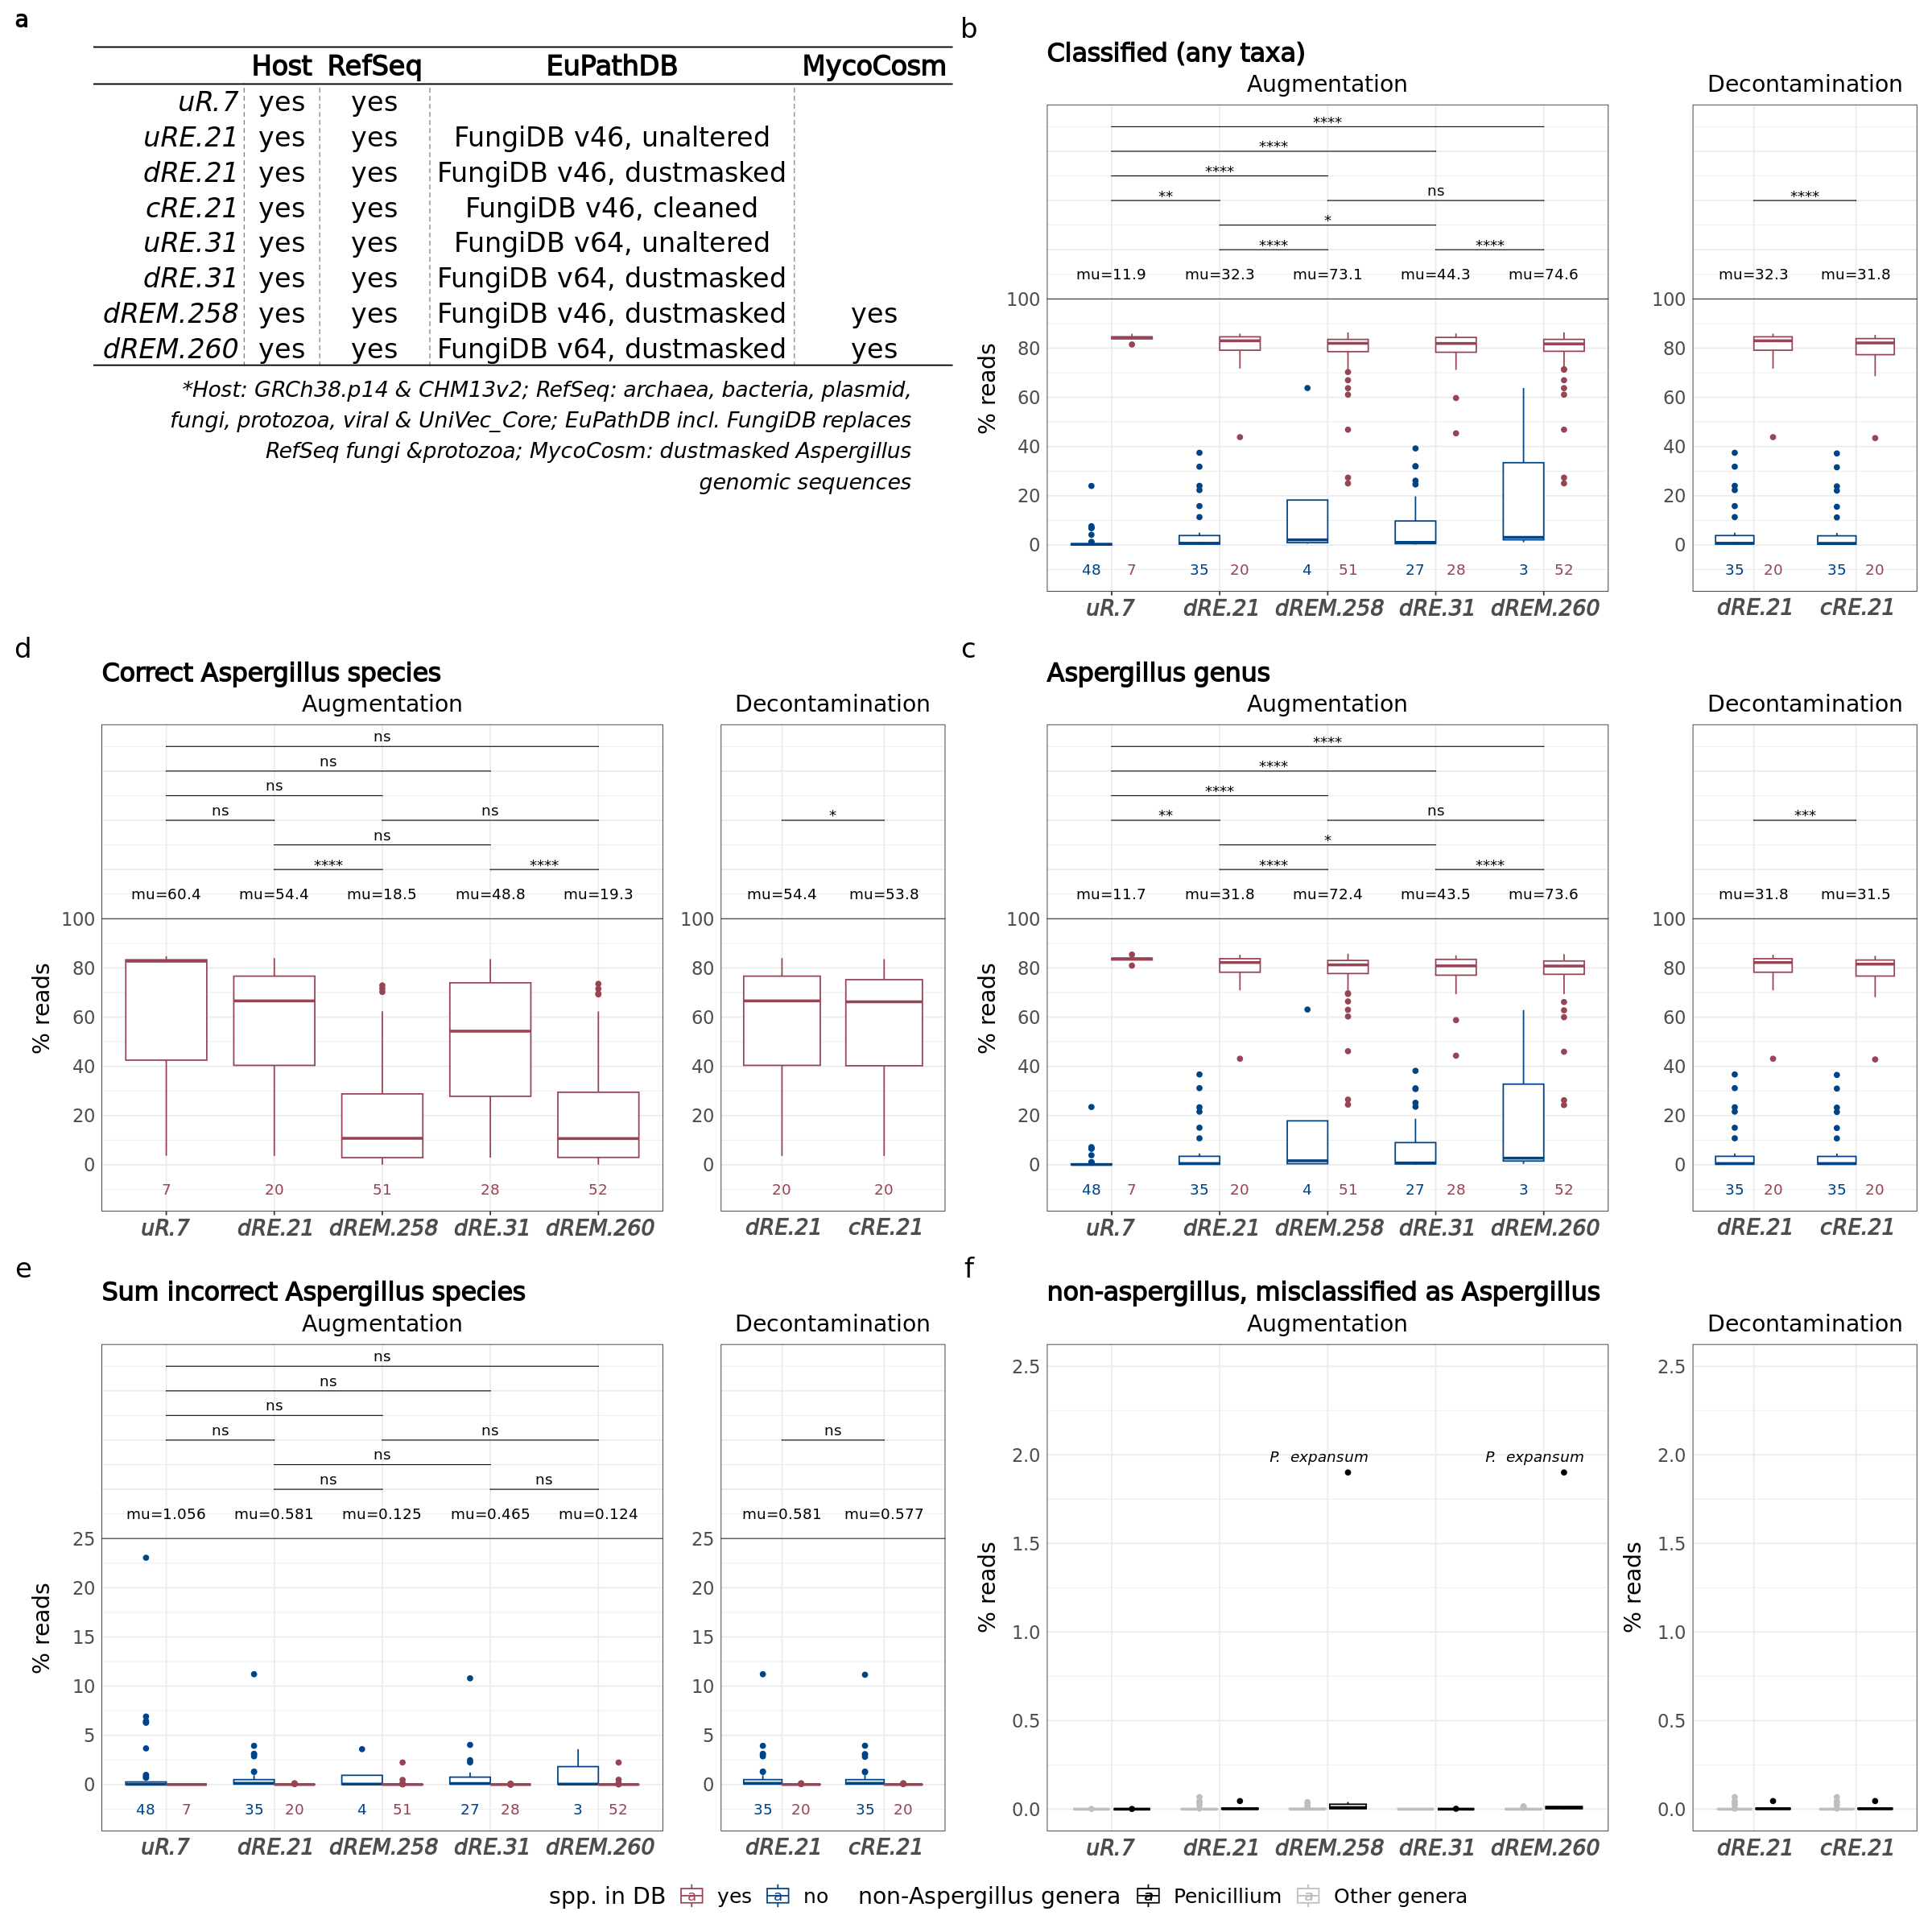

In [50]:
options(repr.plot.width=20, repr.plot.height=20)
layout <- "AABC
           ##BC
           LLBC
           DEFG
           HIJK"

Fig3 <- (plt_db + labs(tag = "a")) +
    (plt_DB_extension[[4]] + labs(tag = "b")) + plt_decontamination[[4]] + 
    (plt_DB_extension[[2]] + labs(tag = "d")) + plt_decontamination[[2]] + 
    (plt_DB_extension[[1]] + labs(tag = "c")) + plt_decontamination[[1]] + 
    (plt_DB_extension[[3]] + labs(tag = "e")) + 
    (plt_decontamination[[3]]) + 
    (aug_plot_Pen + ggtitle(label = "non-aspergillus, misclassified as Aspergillus", subtitle = "Augmentation") + 
         labs(tag = "f")) + 
    (decon_plot_Pen + ggtitle(label = "", subtitle = "Decontamination")) + 
        plot_layout(design = layout, ncol = 4, widths = c(3,1.2,3,1.2), heights = c(0.7,0.15,0.15,1,1), guides = "collect") &
        theme(axis.ticks.y = element_blank(), axis.text.x = element_text(face = "bold.italic", size = 16), 
            legend.position='bottom', legend.direction = 'horizontal',
            legend.key.size = unit(0.75, 'cm'), legend.key.height = unit(0.75, 'cm'), legend.key.width = unit(0.75, 'cm'), 
            text = element_text(size = 17), legend.text = element_text(size = 15, colour = "black"),
            plot.title = element_text(size = 19, face = "bold"), 
            plot.subtitle = element_text(size = 17, hjust = 0.5)) 

Fig3

ggsave("../../output/figures/Fig3_R.png", 
       Fig3, width = 20, height = 20)
ggsave("../../output/figures/Fig3_R.pdf", 
       Fig3, width = 20, height = 20)